<a href="https://colab.research.google.com/github/vdcmathieu/HISP_analysis/blob/main/data_mining_final_project_garance_mathieu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HISP Project

This project was made by Garance Décarsin & Mathieu Van de catsije.

## Library

This code imports the different mandatory library useful for the project. Such as Pandas, Numpy, Seaborn or Scikit.

In [2]:
# Libraries Import
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data


### Import

Import of the original dataset using GitHub. We're using Github to store the csv file with the *HISP* data, then importing it thanks to its raw url and the *read_csv* method from Pandas.

In [3]:
# Import of the dataset from GitHub into a Dataframe variable
import pandas as pd
url = "https://raw.githubusercontent.com/vdcmathieu/hisp_project/main/HISP.csv"
original_data_set = pd.read_csv(url)

### Visualization

In [4]:
# Display of the Dataframe with the original data
original_data_set

,locality_identifier,household_identifier,treatment_locality,promotion_locality,eligible,enrolled,enrolled_rp,poverty_index,round,health_expenditures,age_hh,age_sp,educ_hh,educ_sp,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance,enrolled_num
0,26,5,Treatment,Promotion,Eligible,Enrolled,1,55.950542,Before,15.185455,24.0,23,0.0,6.0,0,0,4,1,0,1,124.819966,1
1,26,5,Treatment,Promotion,Eligible,Enrolled,1,55.950542,After,19.580902,25.0,24,0.0,6.0,0,0,4,1,0,1,124.819966,1
2,26,11,Treatment,Promotion,Eligible,Enrolled,0,46.058731,Before,13.076257,30.0,26,4.0,0.0,0,0,6,1,0,2,124.819966,1
3,26,11,Treatment,Promotion,Eligible,Enrolled,0,46.058731,After,2.398854,31.0,27,4.0,0.0,0,0,6,1,0,2,124.819966,1
4,26,13,Treatment,Promotion,Eligible,Enrolled,0,54.095825,After,0.000000,59.0,57,0.0,0.0,0,0,6,1,0,4,124.819966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19822,35,15738,Control,No promotion,Not eligible,Not enrolled,0,59.737247,Before,16.811539,52.0,41,0.0,2.0,0,1,7,0,1,2,162.748811,0
19823,40,15769,Treatment,Promotion,Not eligible,Not enrolled,0,62.055641,Before,15.906003,51.0,40,5.0,2.0,0,1,5,1,1,1,114.763392,0
19824,40,15769,Treatment,Promotion,Not eligible,Not enrolled,0,62.055641,After,8.248152,52.0,41,5.0,2.0,0,1,5,1,1,1,114.763392,0
19825,40,15778,Treatment,Promotion,Not eligible,Not enrolled,0,62.828438,Before,8.737772,58.0,49,3.0,0.0,0,1,9,1,1,4,114.763392,0


### Variables meaning

<p>The dataset includes a number of important variables you’ll use throughout this assignment:</p>
<table class="table table-condensed">
<colgroup>
<col width="24%">
<col width="75%">
</colgroup>
<thead>
<tr class="header">
<th>Variable name</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><code>health_expenditures</code></td>
<td>Out of pocket health expenditures (per person per year)</td>
</tr>
<tr class="even">
<td><code>eligible</code></td>
<td>Household eligible to enroll in HISP</td>
</tr>
<tr class="odd">
<td><code>enrolled</code></td>
<td>Household enrolled in HISP</td>
</tr>
<tr class="even">
<td><code>round</code></td>
<td>Indicator for before and after intervention</td>
</tr>
<tr class="odd">
<td><code>treatment_locality</code></td>
<td>Household is located in treatment community</td>
</tr>
<tr class="even">
<td><code>poverty_index</code></td>
<td>1-100 scale of poverty</td>
</tr>
<tr class="odd">
<td><code>promotion_locality</code></td>
<td>Household is located in community that received random promotion</td>
</tr>
<tr class="even">
<td><code>enrolled_rp</code></td>
<td>Household enrolled in HISP following random promotion</td>
</tr>
</tbody>
</table>
<p>It also includes several demographic variables about the households. <strong>Each of these are backdoor confounders between health expenditures participation in the HISP</strong>:</p>
<table class="table table-condensed">
<thead>
<tr class="header">
<th>Variable name</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><code>age_hh</code></td>
<td>Age of the head of household (years)</td>
</tr>
<tr class="even">
<td><code>age_sp</code></td>
<td>Age of the spouse (years)</td>
</tr>
<tr class="odd">
<td><code>educ_hh</code></td>
<td>Education of the head of household (years)</td>
</tr>
<tr class="even">
<td><code>educ_sp</code></td>
<td>Education of the spouse (years)</td>
</tr>
<tr class="odd">
<td><code>female_hh</code></td>
<td>Head of household is a woman (1 = yes)</td>
</tr>
<tr class="even">
<td><code>indigenous</code></td>
<td>Head of household speaks an indigenous language (1 = yes)</td>
</tr>
<tr class="odd">
<td><code>hhsize</code></td>
<td>Number of household members</td>
</tr>
<tr class="even">
<td><code>dirtfloor</code></td>
<td>Home has a dirt floor (1 = yes)</td>
</tr>
<tr class="odd">
<td><code>bathroom</code></td>
<td>Home has a private bathroom (1 = yes)</td>
</tr>
<tr class="even">
<td><code>land</code></td>
<td>Number of hectares of land owned by household</td>
</tr>
<tr class="odd">
<td><code>hospital_distance</code></td>
<td>Distance to closest hospital (km)</td>
</tr>
</tbody>
</table>

## Data cleaning

In [5]:
df = original_data_set.copy()

### General information on the dataframe

Use the function `.info()` to get information regarding each column of the dataframe. Thus, we can now focus on the column which need to be patched (mostly the column with an , such as `treatment_locality`.

In [6]:
# Get column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19827 entries, 0 to 19826
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_identifier   19827 non-null  int64  
 1   household_identifier  19827 non-null  int64  
 2   treatment_locality    19827 non-null  object 
 3   promotion_locality    19827 non-null  object 
 4   eligible              19827 non-null  object 
 5   enrolled              19827 non-null  object 
 6   enrolled_rp           19827 non-null  int64  
 7   poverty_index         19827 non-null  float64
 8   round                 19827 non-null  object 
 9   health_expenditures   19827 non-null  float64
 10  age_hh                19827 non-null  float64
 11  age_sp                19827 non-null  int64  
 12  educ_hh               19827 non-null  float64
 13  educ_sp               19827 non-null  float64
 14  female_hh             19827 non-null  int64  
 15  indigenous         

### Delete double

#### enrolled_num

It seems that `enrolled_num`is a simple duplica of `enrolled`. Let's check if it is true. If it is, we delete `enrolled_num`.

In [7]:
# Check if the two column are indeed the same
df.enrolled.replace({"Enrolled":1, "Not enrolled":0}).equals(df.enrolled_num)

True

The two column seems indeed to be the same (`.equals()` returns `True`). We can delete the `enrolled_num` column, using the `.drop()` method from *Pandas*.

In [8]:
# We delete the column named 'enrolled_num'
df = df.drop(columns=["enrolled_num"])

### Adjustement of DType

In [9]:
# Change Dtype of the necessarty column
df.treatment_locality = df.treatment_locality.astype('category')
df.promotion_locality = df.promotion_locality.astype('category')
df.eligible = df.eligible.astype('category')
df.enrolled = df.enrolled.astype('category')
df['round'] = df['round'].astype('category')

In [10]:
# Check that all Dtype has been changed to the correct values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19827 entries, 0 to 19826
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   locality_identifier   19827 non-null  int64   
 1   household_identifier  19827 non-null  int64   
 2   treatment_locality    19827 non-null  category
 3   promotion_locality    19827 non-null  category
 4   eligible              19827 non-null  category
 5   enrolled              19827 non-null  category
 6   enrolled_rp           19827 non-null  int64   
 7   poverty_index         19827 non-null  float64 
 8   round                 19827 non-null  category
 9   health_expenditures   19827 non-null  float64 
 10  age_hh                19827 non-null  float64 
 11  age_sp                19827 non-null  int64   
 12  educ_hh               19827 non-null  float64 
 13  educ_sp               19827 non-null  float64 
 14  female_hh             19827 non-null  int64   
 15  in

### Encoding of the non numerical variables

In [11]:
# Create a copy of the main dataframe so we can work on it without worrying it might impact our data.
encoded_df = df.copy()

Non numerical variables need to be encoded into numerical one, so it can be interpreted correctly during the following steps.

To do so, we transform categorical data into number. For example, the column `treatment_locality` which countains two uniques values : `Control`& `Treatment` ; can be transformed into one column `Control`with value 0 or 1. If the value is 0, then it correspond to `Treatment` if it is 1, then it is `Control`.

##### treatment_locality

In [12]:
encoded_df.treatment_locality = pd.get_dummies(encoded_df.treatment_locality).Control

In [13]:
encoded_df.treatment_locality

0        0
1        0
2        0
3        0
4        0
        ..
19822    1
19823    0
19824    0
19825    0
19826    0
Name: treatment_locality, Length: 19827, dtype: uint8

##### promotion_locality

In [14]:
encoded_df.promotion_locality = pd.get_dummies(encoded_df.promotion_locality).Promotion

In [15]:
encoded_df.promotion_locality

0        1
1        1
2        1
3        1
4        1
        ..
19822    0
19823    1
19824    1
19825    1
19826    1
Name: promotion_locality, Length: 19827, dtype: uint8

##### eligible

In [16]:
encoded_df.eligible = pd.get_dummies(encoded_df.eligible).Eligible

In [17]:
encoded_df.eligible

0        1
1        1
2        1
3        1
4        1
        ..
19822    0
19823    0
19824    0
19825    0
19826    0
Name: eligible, Length: 19827, dtype: uint8

##### enrolled

In [18]:
encoded_df.enrolled = pd.get_dummies(encoded_df.enrolled).Enrolled

In [19]:
encoded_df.enrolled

0        1
1        1
2        1
3        1
4        1
        ..
19822    0
19823    0
19824    0
19825    0
19826    0
Name: enrolled, Length: 19827, dtype: uint8

##### round

In [20]:
encoded_df['round'] = pd.get_dummies(encoded_df['round'])['After']

In [21]:
encoded_df['round']

0        0
1        1
2        0
3        1
4        1
        ..
19822    0
19823    0
19824    1
19825    0
19826    1
Name: round, Length: 19827, dtype: uint8

##### Check

In [22]:
encoded_df

,locality_identifier,household_identifier,treatment_locality,promotion_locality,eligible,enrolled,enrolled_rp,poverty_index,round,health_expenditures,age_hh,age_sp,educ_hh,educ_sp,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance
0,26,5,0,1,1,1,1,55.950542,0,15.185455,24.0,23,0.0,6.0,0,0,4,1,0,1,124.819966
1,26,5,0,1,1,1,1,55.950542,1,19.580902,25.0,24,0.0,6.0,0,0,4,1,0,1,124.819966
2,26,11,0,1,1,1,0,46.058731,0,13.076257,30.0,26,4.0,0.0,0,0,6,1,0,2,124.819966
3,26,11,0,1,1,1,0,46.058731,1,2.398854,31.0,27,4.0,0.0,0,0,6,1,0,2,124.819966
4,26,13,0,1,1,1,0,54.095825,1,0.000000,59.0,57,0.0,0.0,0,0,6,1,0,4,124.819966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19822,35,15738,1,0,0,0,0,59.737247,0,16.811539,52.0,41,0.0,2.0,0,1,7,0,1,2,162.748811
19823,40,15769,0,1,0,0,0,62.055641,0,15.906003,51.0,40,5.0,2.0,0,1,5,1,1,1,114.763392
19824,40,15769,0,1,0,0,0,62.055641,1,8.248152,52.0,41,5.0,2.0,0,1,5,1,1,1,114.763392
19825,40,15778,0,1,0,0,0,62.828438,0,8.737772,58.0,49,3.0,0.0,0,1,9,1,1,4,114.763392


In [23]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19827 entries, 0 to 19826
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_identifier   19827 non-null  int64  
 1   household_identifier  19827 non-null  int64  
 2   treatment_locality    19827 non-null  uint8  
 3   promotion_locality    19827 non-null  uint8  
 4   eligible              19827 non-null  uint8  
 5   enrolled              19827 non-null  uint8  
 6   enrolled_rp           19827 non-null  int64  
 7   poverty_index         19827 non-null  float64
 8   round                 19827 non-null  uint8  
 9   health_expenditures   19827 non-null  float64
 10  age_hh                19827 non-null  float64
 11  age_sp                19827 non-null  int64  
 12  educ_hh               19827 non-null  float64
 13  educ_sp               19827 non-null  float64
 14  female_hh             19827 non-null  int64  
 15  indigenous         

Our dataset (`encoded_df`) now only contains numerical (`uint8`, `int64`, or `float64`), so it is exploitable by a regression tool.

## Descriptive Statistics

We are looking for trend in our data explaining the way our multiples variables interact with `health_expenditures`.

### Correlation

A method to quickly hover every variables together to find trends is to search for correlation value between each variables. This can be done using the `.corr()` method from *Pandas*.

#### Pearson method

The pearson correlation coefficient measures a linear correlation between two variables.

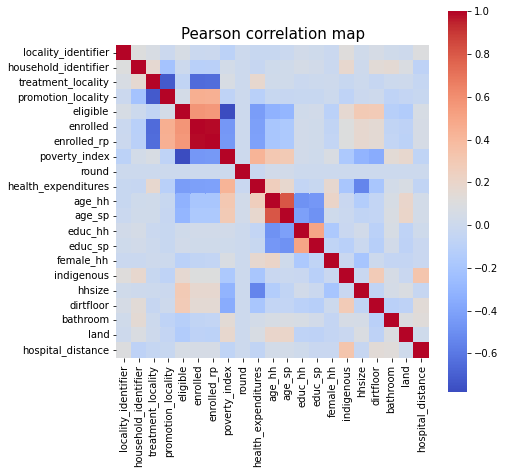

In [24]:
# Create Pearson correlation map to vizualise the different correlation in between the column
fig = plt.figure(figsize=(7, 7))
sns.heatmap(encoded_df.corr(), vmax=1., square=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.title("Pearson correlation map", fontsize=15)
plt.show()

In [25]:
# Get all the correlation value (with pearson method) and filter on the column 'health_expenditures'
corr_pearson = encoded_df.corr()
corr_pearson[['health_expenditures']]

,health_expenditures
locality_identifier,-0.025461
household_identifier,-0.033246
treatment_locality,0.182393
promotion_locality,-0.105620
eligible,-0.425658
enrolled,-0.412693
enrolled_rp,-0.406346
poverty_index,0.428248
round,-0.018930
health_expenditures,1.000000


#### Spearman Method

The Spearman correlation is studied when two statistical variables seem to be correlated without the relationship between the two variables being of affine type. It consists in finding a correlation coefficient, not between the values taken by the two variables but between the ranks of these values.

Note that there is also the Kendall's method to obtain a correlation by rank.

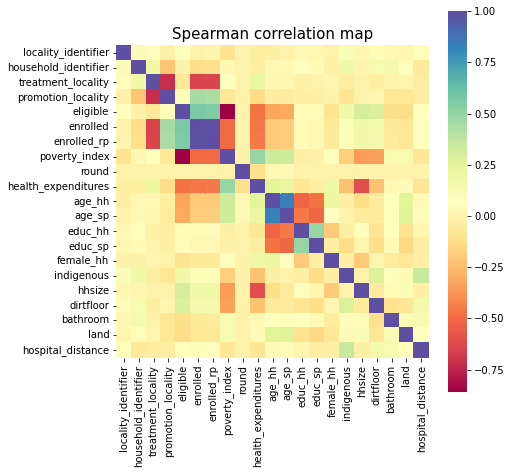

In [26]:
# Create Spearman correlation map to vizualise the different correlation in between the column
fig = plt.figure(figsize=(7, 7))
sns.heatmap(encoded_df.corr(method="spearman"), vmax=1., square=True, cmap=sns.color_palette("Spectral", as_cmap=True))
plt.title("Spearman correlation map", fontsize=15)
plt.show()

In [27]:
# Get all the correlation value (with Spearman method) and filter on the column 'health_expenditures'
corr_spearman = encoded_df.corr(method="spearman")
corr_spearman[['health_expenditures']]

,health_expenditures
locality_identifier,-0.025230
household_identifier,-0.025524
treatment_locality,0.201720
promotion_locality,-0.118274
eligible,-0.471047
enrolled,-0.456721
enrolled_rp,-0.450176
poverty_index,0.493679
round,-0.109338
health_expenditures,1.000000


#### Observartion

Variable with a correlation higher than 0.4 are suposed impactful on our main variable (`health_expenditures`). Thus, we have:
*   `eligible`: **Household eligible to enroll in HISP** (Pearson: -0.42; Spearman: -0.47)
*   `enrolled`: **Household enrolled in HISP** (Pearson: -0.41; Spearman: -0.45)
*   `enrolled_rp`: 	**Household enrolled in HISP following random promotion** (Pearson: -0.4; Spearman: -0.45)
*   `poverty_index`: **1-100 scale of poverty** (Pearson: 0.42; Spearman: 0.49)
*   `hhsize`: **Number of household members** (Pearson: -0.54; Spearman: -0.61)

The higher the correlation the most positive impact the variable has on the `health_expenditure`, the lower (close to -1) the most negative impact it has. Near 0 correlation values have a negligibable impact.
Which means that when `enrolled_rp` increase by 1, `health_expediture` decrease 0.4. On the contrary, when `poverty_index` increase by 1 `health_expenditure` increase by 0.42. 

### Analysis

#### Household eligible to enroll in HISP

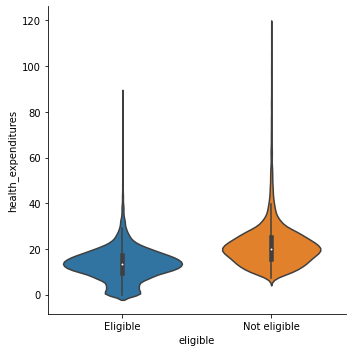

In [28]:
sns.catplot(x="eligible", y="health_expenditures", kind="violin", data=df)

#### Household enrolled in HISP

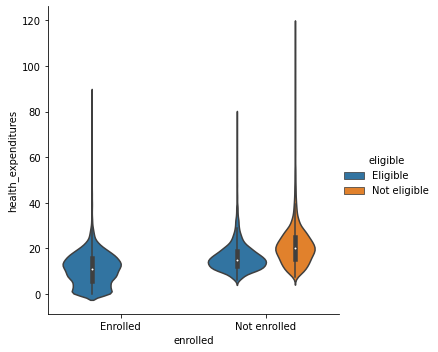

In [29]:
sns.catplot(x="enrolled", y="health_expenditures", kind="violin", hue="eligible", data=df)

#### Household enrolled in HISP following random promotion

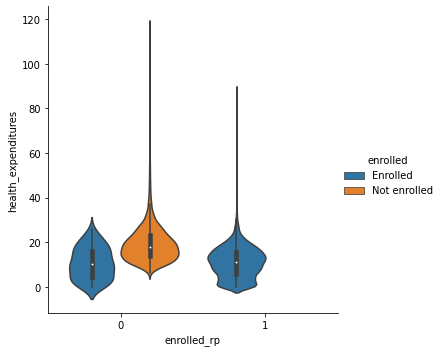

In [30]:
sns.catplot(x="enrolled_rp", y="health_expenditures", kind="violin", hue="enrolled", data=df)

Add plot description.

#### 1-100 scale of poverty

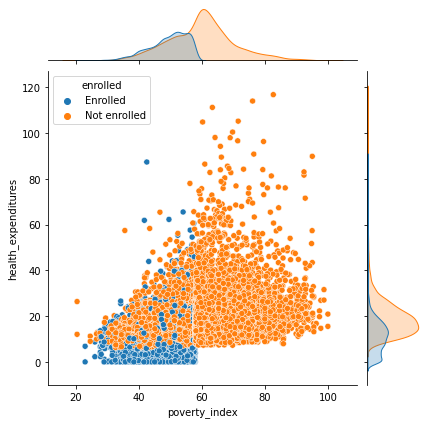

In [31]:
sns.jointplot(x="poverty_index", y="health_expenditures", hue="enrolled", data=df)

#### Number of household members

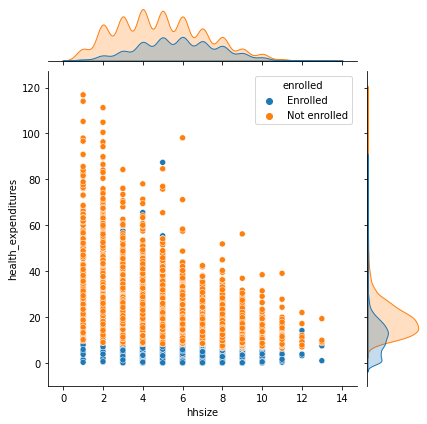

In [32]:
sns.jointplot(x="hhsize", y="health_expenditures", hue="enrolled", data=df)

## Data preparation for Regression

### Drop unnecessary columns

In addition, only the variables below will be used to train your model:
* poverty_index 
* age_hh
* age_sp
* educ_hh
* educ_sp
* female_hh
* indigenous
* hhsize
* dirtfloor
* bathroom
* land
* hospital_distance

Thus we can drop the other column.

In [33]:
encoded_df = encoded_df[['poverty_index','age_hh','age_sp','educ_hh','educ_sp','female_hh','indigenous','hhsize','dirtfloor','bathroom','land','hospital_distance','health_expenditures','round']]

We also can filter on only `round=before`.

In [34]:
encoded_df = encoded_df[encoded_df['round']==0]

In [35]:
encoded_df

,poverty_index,age_hh,age_sp,educ_hh,educ_sp,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance,health_expenditures,round
0,55.950542,24.0,23,0.0,6.0,0,0,4,1,0,1,124.819966,15.185455,0
2,46.058731,30.0,26,4.0,0.0,0,0,6,1,0,2,124.819966,13.076257,0
5,54.095825,58.0,56,0.0,0.0,0,0,6,1,0,4,124.819966,15.286353,0
7,56.903400,35.0,24,3.0,0.0,0,0,7,1,0,2,124.819966,11.311761,0
8,46.908810,37.0,35,0.0,0.0,0,0,7,1,0,2,124.819966,11.223912,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19818,74.980682,46.0,38,5.0,3.0,0,1,7,0,0,2,162.748811,14.214518,0
19820,58.153015,38.0,41,3.0,2.0,1,1,7,1,1,3,162.748811,13.606447,0
19822,59.737247,52.0,41,0.0,2.0,0,1,7,0,1,2,162.748811,16.811539,0
19823,62.055641,51.0,40,5.0,2.0,0,1,5,1,1,1,114.763392,15.906003,0


### Split the Dataframe into a training and test sets

Before using regression method on our data, we need to split it into two different set. One will be use to train our algorithm, the other to test it. We cannot use the same data for both since it would lead to the algorithm answering what he already knows and not what he had to predict.

In [36]:
X = encoded_df.drop("health_expenditures", axis=1)
Y = encoded_df.health_expenditures

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
print(f' X_train = {X_train.shape}\n X_test = {X_test.shape}\n Y_train = {Y_train.shape}\n Y_test = {Y_test.shape}')

 X_train = (7930, 13)
 X_test = (1983, 13)
 Y_train = (7930,)
 Y_test = (1983,)


## Linear Model

### Import

In [39]:
# importing module of linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Creation of Linear Regression

In [40]:
# cratinf an object of LinearRegression class
LR = LinearRegression()
# fitting the traning
LR.fit(X_train, Y_train)

LinearRegression()

In [41]:
coef = LR.coef_
coef

array([ 5.17886353e-02,  6.82224192e-02,  1.21679578e-02,  1.58499703e-01,
       -5.14256028e-02,  1.64493460e+00, -2.74864908e+00, -2.00048242e+00,
       -2.54898364e+00,  3.88853182e-01,  1.89496162e-01,  5.86077268e-04,
        0.00000000e+00])

In [42]:
LR.intercept_

22.32131751981288

### Model values (coef & intercept)

In [43]:
print("health_expedenditure =")
for i, head in enumerate(LR.feature_names_in_):
  print(f'{coef[i]:.2f}*{head}+')
print(f'+{LR.intercept_}')

health_expedenditure =
0.05*poverty_index+
0.07*age_hh+
0.01*age_sp+
0.16*educ_hh+
-0.05*educ_sp+
1.64*female_hh+
-2.75*indigenous+
-2.00*hhsize+
-2.55*dirtfloor+
0.39*bathroom+
0.19*land+
0.00*hospital_distance+
0.00*round+
+22.32131751981288


### Prediction

Now that we have our linear regression model, we can try it out on our test data set.

In [44]:
# prediction of Y 
Y_prediction = LR.predict(X_test)
Y_prediction

array([21.76200269, 20.52409391, 18.73921597, ...,  9.83376104,
       20.15336691,  7.48862422])

In [45]:
diff = []
for i in range(20):
  print(f'Real Y = {Y_test.to_numpy()[i]} ; Model Y = {Y_prediction[i]} ; Diff = {Y_test.to_numpy()[i]-Y_prediction[i]}')
  diff.append(Y_test.to_numpy()[i]-Y_prediction[i])
print(f'Average diff={sum(diff) / len(diff)}')

Real Y = 20.9176349639893 ; Model Y = 21.76200269415916 ; Diff = -0.8443677301698607
Real Y = 21.0587882995605 ; Model Y = 20.52409390888394 ; Diff = 0.5346943906765596
Real Y = 18.2669982910156 ; Model Y = 18.73921597349028 ; Diff = -0.4722176824746782
Real Y = 18.2212982177734 ; Model Y = 17.63476283451625 ; Diff = 0.58653538325715
Real Y = 26.1605434417725 ; Model Y = 29.69622494829349 ; Diff = -3.535681506520991
Real Y = 10.4642553329468 ; Model Y = 9.887994864034892 ; Diff = 0.576260468911908
Real Y = 16.3610668182373 ; Model Y = 16.819939180385227 ; Diff = -0.4588723621479254
Real Y = 13.8961334228516 ; Model Y = 13.869769256708107 ; Diff = 0.026364166143492795
Real Y = 17.3315181732178 ; Model Y = 17.204867079372672 ; Diff = 0.12665109384512618
Real Y = 29.115798950195302 ; Model Y = 25.867021642878942 ; Diff = 3.2487773073163595
Real Y = 10.6093883514404 ; Model Y = 10.78068319264408 ; Diff = -0.17129484120368055
Real Y = 18.195119857788104 ; Model Y = 19.336438050812195 ; Diff

### Score

To know if our model is precise, we can refer to its scores (𝚁², MSE, or RMSE).

In [46]:
# predicting the accuracy score
score=r2_score(Y_test,Y_prediction)
print(" r2 socre is ",score)
print(" mean_sqrd_error is ",mean_squared_error(Y_test,Y_prediction))
print(" root_mean_squared error of is ",np.sqrt(mean_squared_error(Y_test,Y_prediction)))

 r2 socre is  0.9618749584096511
 mean_sqrd_error is  1.201770438271254
 root_mean_squared error of is  1.096252907987593


The Mean squared error is verry low also as the coefficient of correlation (r), which indicates that our model isn't that precise.

## Random Forest Regressor

### Import

In [47]:
# Import necessary library
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

### Model creation

In [48]:
rf = RandomForestRegressor()

### Fit

In [49]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

### Prediction

In [50]:
rf_prediction = rf.predict(X_test)

### Scores

In [51]:
# predicting the accuracy score
rf_score=rf.score(X_test,Y_test)
print(" Score is ",rf_score)
print(" mean_sqrd_error is ",mean_squared_error(Y_test,rf_prediction))
print(" root_mean_squared error of is ",np.sqrt(mean_squared_error(Y_test,rf_prediction)))

 Score is  0.9830032071481262
 mean_sqrd_error is  0.5357697288380907
 root_mean_squared error of is  0.731962928595493


## Decision Tree regressor

### Import

In [52]:
from sklearn.tree import DecisionTreeRegressor

### Model Creation

In [53]:
dt = DecisionTreeRegressor()

### Fit

In [54]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

### Prediction

In [55]:
dt_prediction = dt.predict(X_test)

### Scores

In [56]:
# predicting the accuracy score
dt_score=dt.score(X_test,Y_test)
print(" Score is ",dt_score)
print(" mean_sqrd_error is ",mean_squared_error(Y_test,dt_prediction))
print(" root_mean_squared error of is ",np.sqrt(mean_squared_error(Y_test,dt_prediction)))

 Score is  0.9700819687971787
 mean_sqrd_error is  0.9430705901165312
 root_mean_squared error of is  0.9711182163447101


### Neural network (test)

In [57]:
from sklearn.neural_network import MLPRegressor

In [69]:
regr = MLPRegressor(random_state=1, max_iter=5000).fit(X_train, Y_train)

In [70]:
ml_prediction = regr.predict(X_test)

In [71]:
regr.score(X_test, Y_test)

0.9763115410071908

## Models comparison


To compare the three models we just create, we can use fours indicators:
*   MSE: Mean square error ;
*   RMSE: Root Mean;
*   MAE: Mean Absolute Error;
*   MAPE: Mean absolute pourcentage error.

MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. You cannot interpret many insights from one single result but it gives you a real number to compare against other model results and help you select the best regression model.

Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

MAPE (Mean Absolute Percentage Error) is an error metric used to measure the performance of regression machine learning models. It is a popular metric to use amongst data scientists as it returns the error as a percentage, making it both easy for end users to understand and simpler to compare model accuracy across use cases and datasets.

In those three cases : **the lower, the better**.

### Get scores using SKLearn.Metrics

In [85]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#### Linear Regression

In [88]:
print("Linear regression MSE score : %f" % mean_squared_error(Y_test,Y_prediction))
print("Linear regression RMSE score : %f" % np.sqrt(mean_squared_error(Y_test,Y_prediction)))
print("Linear regression MAE score : %f" % mean_absolute_error(Y_test,Y_prediction))
print("Linear regression MAPE score : %f" % mean_absolute_percentage_error(Y_test, Y_prediction))

Linear regression MSE score : 1.201770
Linear regression RMSE score : 1.096253
Linear regression MAE score : 0.760838
Linear regression MAPE score : 0.045176


#### Random forest regression

In [87]:
print("Random forest MSE score : %f" % mean_squared_error(Y_test,rf_prediction))
print("Random forest RMSE score : %f" % np.sqrt(mean_squared_error(Y_test,rf_prediction)))
print("Random forest MAE score : %f" % mean_absolute_error(Y_test,rf_prediction))
print("Random forest MAPE score : %f" % mean_absolute_percentage_error(Y_test, rf_prediction))

Random forest MSE score : 0.535770
Random forest RMSE score : 0.731963
Random forest MAE score : 0.454953
Random forest MAPE score : 0.028339


#### Decision Tree Regression

In [89]:
print("Decision tree MSE score : %f" % mean_squared_error(Y_test,dt_prediction))
print("Decision tree RMSE score : %f" % np.sqrt(mean_squared_error(Y_test,dt_prediction)))
print("Decision tree MAE score : %f" % mean_absolute_error(Y_test,dt_prediction))
print("Decision tree MAPE score : %f" % mean_absolute_percentage_error(Y_test, dt_prediction))

Decision tree MSE score : 0.943071
Decision tree RMSE score : 0.971118
Decision tree MAE score : 0.611063
Decision tree MAPE score : 0.038100


#### Machine Learning (Neural network) Regression

In [90]:
print("Machine Learning MSE score : %f" % mean_squared_error(Y_test,ml_prediction))
print("Machine Learning RMSE score : %f" % np.sqrt(mean_squared_error(Y_test,ml_prediction)))
print("Machine Learning MAE score : %f" % mean_absolute_error(Y_test,ml_prediction))
print("Machine learning MAPE score : %f" % mean_absolute_percentage_error(Y_test, ml_prediction))

Machine Learning MSE score : 0.746703
Machine Learning RMSE score : 0.864120
Machine Learning MAE score : 0.597930
Machine learning MAPE score : 0.035540


### Who's the best ?

|      | Linear Regression | Random Forest Regression | Decision Tree Regression | Machine Learning Regression |
|------|:-----------------:|:------------------------:|:------------------------:|:------------------------:|
| MSE  |         1.201770 |                0.538323 |                0.939139 | 0.746703|
| RMSE |          1.096253 |                 0.733705 |                 0.969092 | 0.864120|
| MAE  |          0.760838 |                 0.456488 |                 0.607660 |0.597930|

As we previously indicated, **the lower, the better**, thus we can evaluate that the best regressor tool used here is the **Random Forest Regressor**.

Although we have to notice that the linear regression method gives the nearly same result as the Random forest. Except for the MAE where RF is aboout 25% better.

### 100 values plot

Based on the fact that we are working with a lot of variables it is complicated to plot. We can plot on one intersting value, such as `poverty_index` or `age`.

#### Poverty index

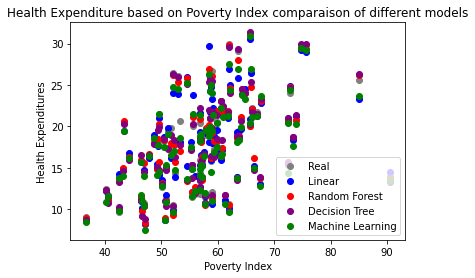

In [73]:
plt.scatter(X_test.poverty_index[:100], Y_test[:100], color="grey", label="Real")
plt.scatter(X_test.poverty_index[:100], Y_prediction[:100], color="blue", label="Linear")
plt.scatter(X_test.poverty_index[:100], rf_prediction[:100], color="red", label="Random Forest")
plt.scatter(X_test.poverty_index[:100], dt_prediction[:100], color="purple", label="Decision Tree")
plt.scatter(X_test.poverty_index[:100], ml_prediction[:100], color="green", label="Machine Learning")

plt.xlabel("Poverty Index")
plt.ylabel("Health Expenditures")

plt.legend()

plt.title("Health Expenditure based on Poverty Index comparaison of different models")

plt.show()

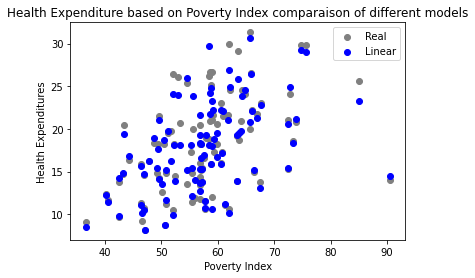

In [75]:
plt.scatter(X_test.poverty_index[:100], Y_test[:100], color="grey", label="Real")
plt.scatter(X_test.poverty_index[:100], Y_prediction[:100], color="blue", label="Linear")


plt.xlabel("Poverty Index")
plt.ylabel("Health Expenditures")

plt.legend()

plt.title("Health Expenditure based on Poverty Index comparaison of different models")

plt.show()

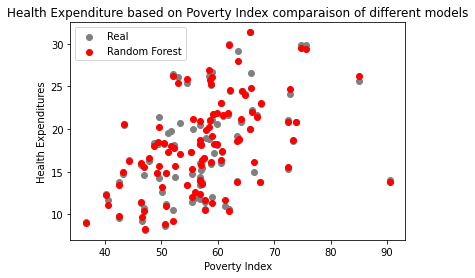

In [76]:
plt.scatter(X_test.poverty_index[:100], Y_test[:100], color="grey", label="Real")
plt.scatter(X_test.poverty_index[:100], rf_prediction[:100], color="red", label="Random Forest")

plt.xlabel("Poverty Index")
plt.ylabel("Health Expenditures")

plt.legend()

plt.title("Health Expenditure based on Poverty Index comparaison of different models")

plt.show()

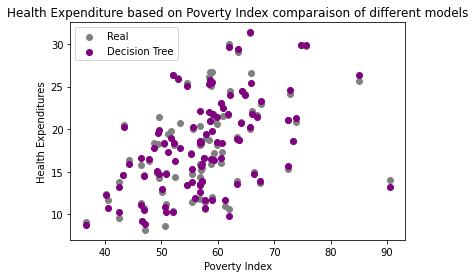

In [77]:
plt.scatter(X_test.poverty_index[:100], Y_test[:100], color="grey", label="Real")
plt.scatter(X_test.poverty_index[:100], dt_prediction[:100], color="purple", label="Decision Tree")

plt.xlabel("Poverty Index")
plt.ylabel("Health Expenditures")

plt.legend()

plt.title("Health Expenditure based on Poverty Index comparaison of different models")

plt.show()

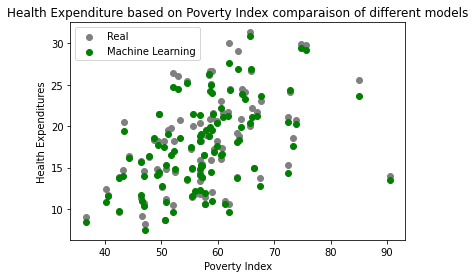

In [74]:
plt.scatter(X_test.poverty_index[:100], Y_test[:100], color="grey", label="Real")
plt.scatter(X_test.poverty_index[:100], ml_prediction[:100], color="green", label="Machine Learning")

plt.xlabel("Poverty Index")
plt.ylabel("Health Expenditures")

plt.legend()

plt.title("Health Expenditure based on Poverty Index comparaison of different models")

plt.show()

#### Age

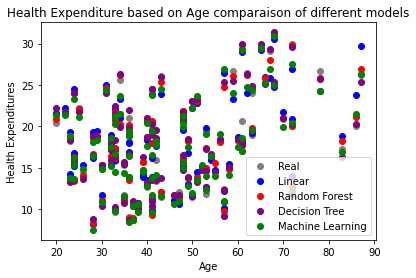

In [79]:
plt.scatter(X_test.age_hh[:100], Y_test[:100], color="grey", label="Real")
plt.scatter(X_test.age_hh[:100], Y_prediction[:100], color="blue", label="Linear")
plt.scatter(X_test.age_hh[:100], rf_prediction[:100], color="red", label="Random Forest")
plt.scatter(X_test.age_hh[:100], dt_prediction[:100], color="purple", label="Decision Tree")
plt.scatter(X_test.age_hh[:100], ml_prediction[:100], color="green", label="Machine Learning")

plt.xlabel("Age")
plt.ylabel("Health Expenditures")

plt.legend()

plt.title("Health Expenditure based on Age comparaison of different models")

plt.show()

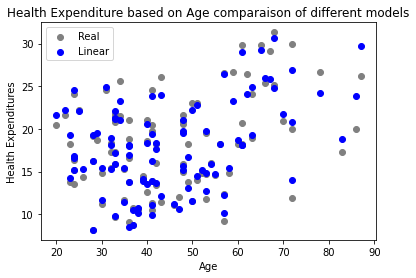

In [80]:
plt.scatter(X_test.age_hh[:100], Y_test[:100], color="grey", label="Real")
plt.scatter(X_test.age_hh[:100], Y_prediction[:100], color="blue", label="Linear")

plt.xlabel("Age")
plt.ylabel("Health Expenditures")

plt.legend()

plt.title("Health Expenditure based on Age comparaison of different models")

plt.show()

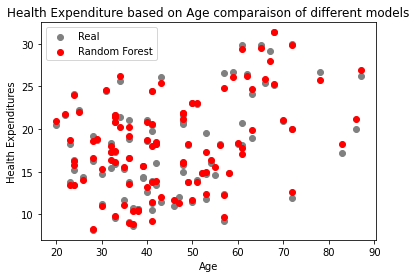

In [81]:
plt.scatter(X_test.age_hh[:100], Y_test[:100], color="grey", label="Real")
plt.scatter(X_test.age_hh[:100], rf_prediction[:100], color="red", label="Random Forest")

plt.xlabel("Age")
plt.ylabel("Health Expenditures")

plt.legend()

plt.title("Health Expenditure based on Age comparaison of different models")

plt.show()

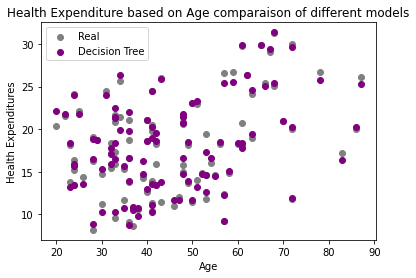

In [83]:
plt.scatter(X_test.age_hh[:100], Y_test[:100], color="grey", label="Real")
plt.scatter(X_test.age_hh[:100], dt_prediction[:100], color="purple", label="Decision Tree")

plt.xlabel("Age")
plt.ylabel("Health Expenditures")

plt.legend()

plt.title("Health Expenditure based on Age comparaison of different models")

plt.show()

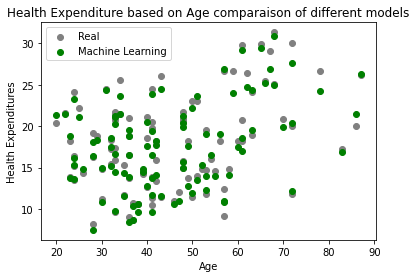

In [84]:
plt.scatter(X_test.age_hh[:100], Y_test[:100], color="grey", label="Real")
plt.scatter(X_test.age_hh[:100], ml_prediction[:100], color="green", label="Machine Learning")

plt.xlabel("Age")
plt.ylabel("Health Expenditures")

plt.legend()

plt.title("Health Expenditure based on Age comparaison of different models")

plt.show()